# Problem Statement:

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

 Obs : 
- Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.
- Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.
- Importing Common Regression Metrics Mean Absolute error, Mean Squared error.
- Importing Label encoder libraries as well as standard scaler libraries.

## Loading Dataset.

In [3]:
advertising = pd.read_csv('advertising.csv')
# advertising is the dataset object 

In [4]:
df=pd.DataFrame(advertising)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


- Separate dataframe for advertising object

In [5]:
df.shape

(200, 5)

- df has 200 obs
- 5 column

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

- shows total column in a dataset where unnamed col will be dropped.

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

-dropping unnamed col

In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

- unnamed col is dropped

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- All Col has continous values  in a dataset.

In [10]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

- All col has float data types.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- dattaframe has 4 column
- 200 rows 
- index 0 = TV & index 3 =s sales.
- all are float data types.

In [18]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

- No missing value seen in a dataset

# Univariate :

## Regression plot

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

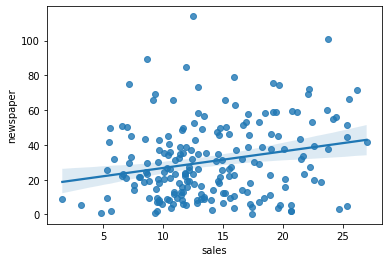

In [23]:
sns.regplot(x="sales",y="newspaper",data=df)

- sales shows linearity with newspaper at low values of sales & high value of sales.
- best fit line can be seen at low value of newspaper & high value of sales.

<AxesSubplot:xlabel='sales', ylabel='radio'>

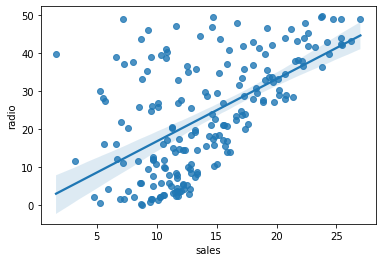

In [26]:
sns.regplot(x="sales",y="radio",data=df) 

- sales shows linearity with radio.
- data is spreaded at low & high values of sales & radio
- best fit line can be seen linearly with sales & radio.

<AxesSubplot:xlabel='sales', ylabel='TV'>

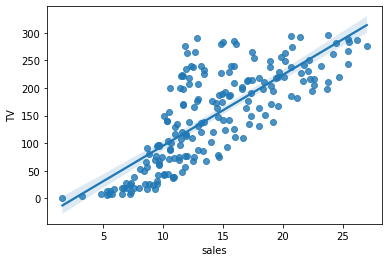

In [25]:
sns.regplot(x="sales",y="TV",data=df)

- sales has very good linear relationship with TV as can be seen with best fit line.

# lm Plot : 2D scatter plot with best fit line.

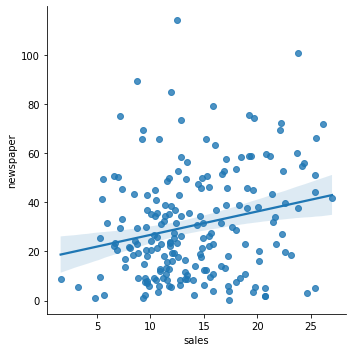

In [27]:
sns.lmplot(x="sales",y="newspaper",data=df)

- sales shows linearity with newspaper at low values of sales & high value of sales.
- best fit line can be seen at low value of newspaper & high value of sales.

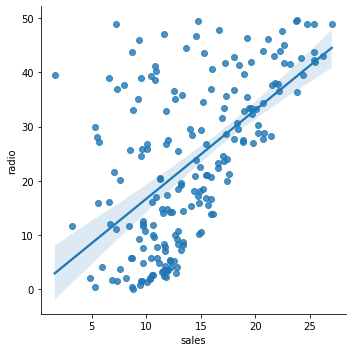

In [28]:
sns.lmplot(x="sales",y="radio",data=df) 

- sales shows linearity with radio.
- data is spreaded at low & high values of sales & radio
- best fit line can be seen linearly with sales & radio.

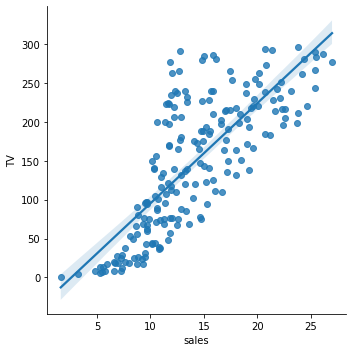

In [29]:
sns.lmplot(x="sales",y="TV",data=df) 

- sales has very good linear relationship with TV as can be seen with best fit line.

## Histogram plot

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

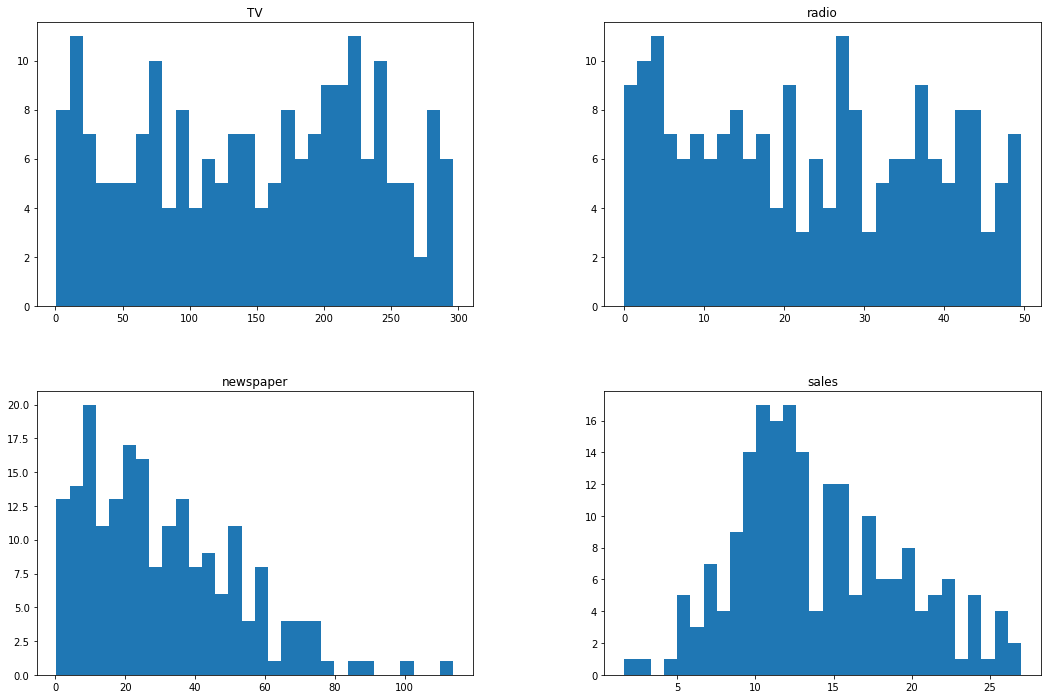

In [30]:
df.hist(grid=False, figsize=(18,12), bins=30)

- newspaper shows right skewed data.
- TV & radio do show normal distribution

# Disstplot

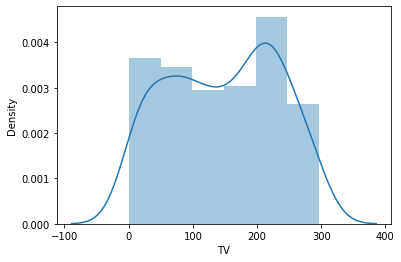

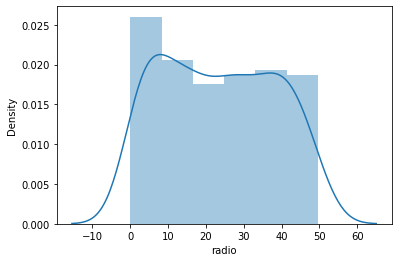

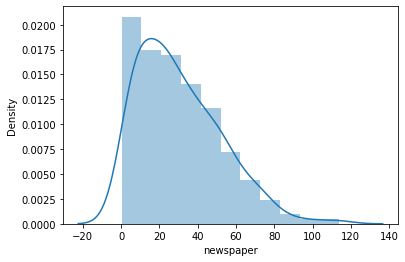

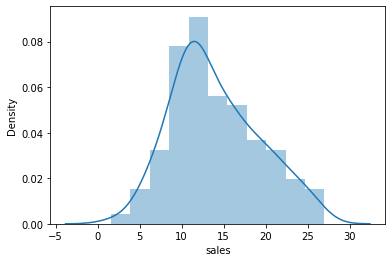

In [31]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- newspaper shows right skewed data.
- TV & radio do show normal distribution

# Boxplot

<AxesSubplot:>

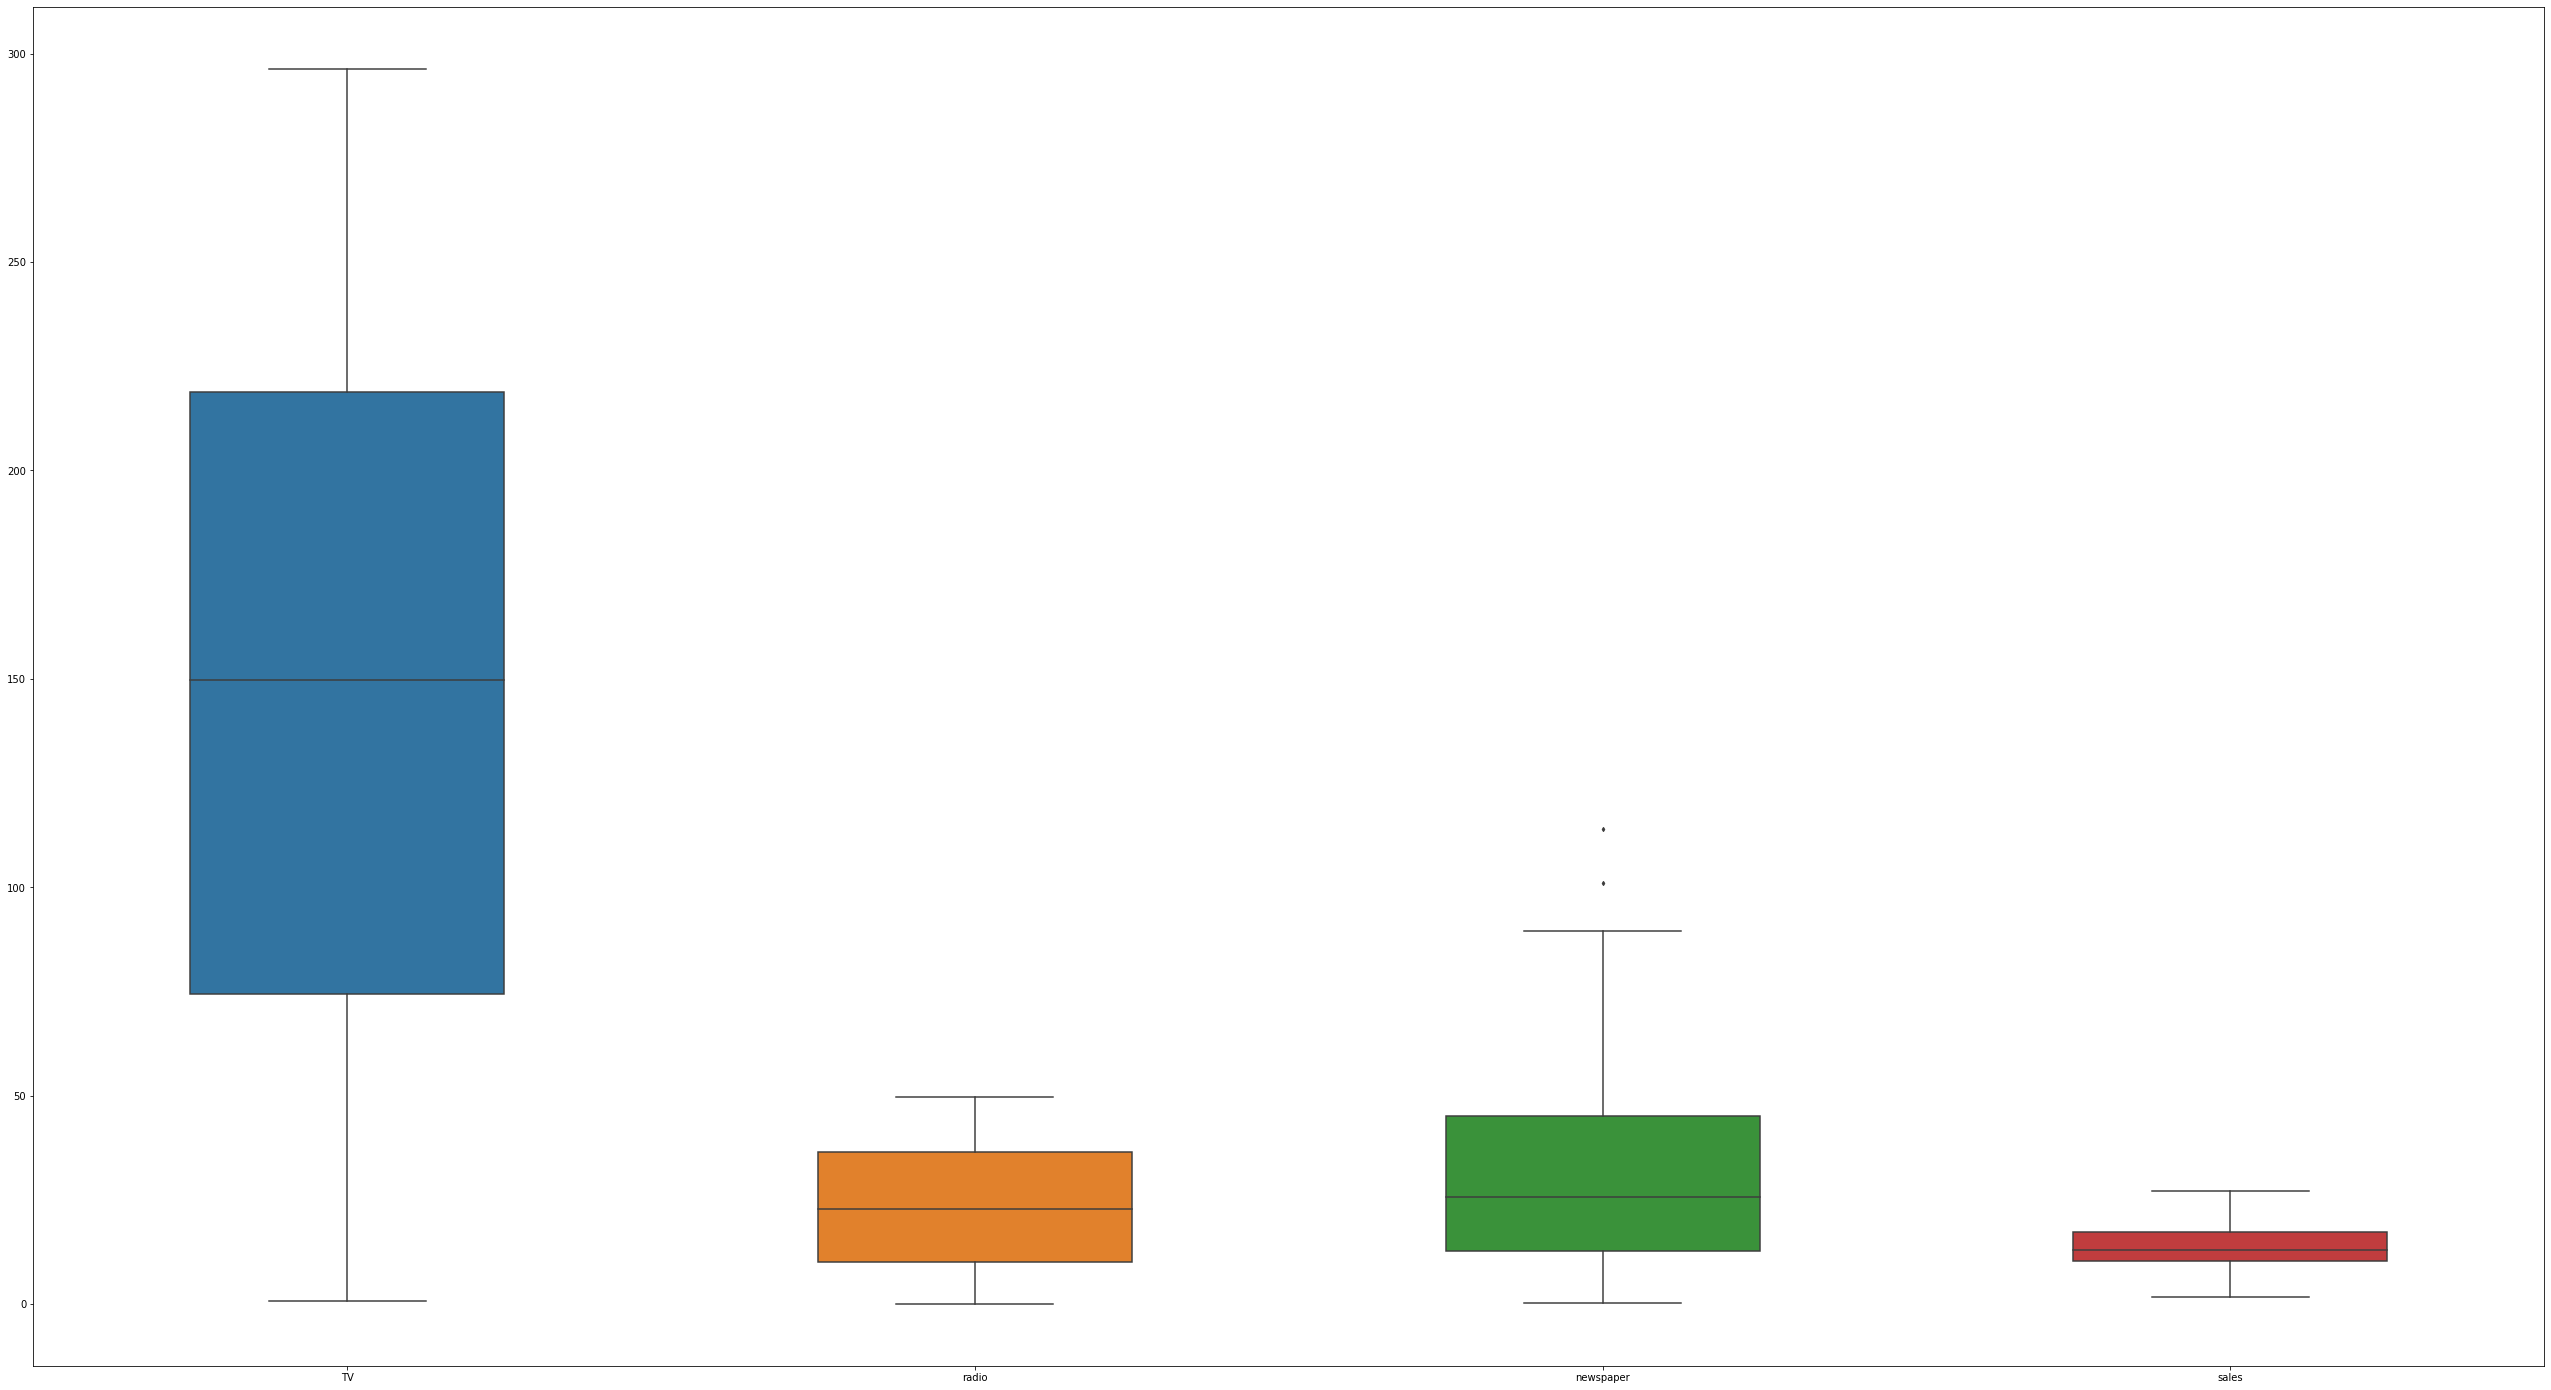

In [32]:
fig, ax =plt.subplots(figsize=(45,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- No outlier present in a dataset.

# Pairplot

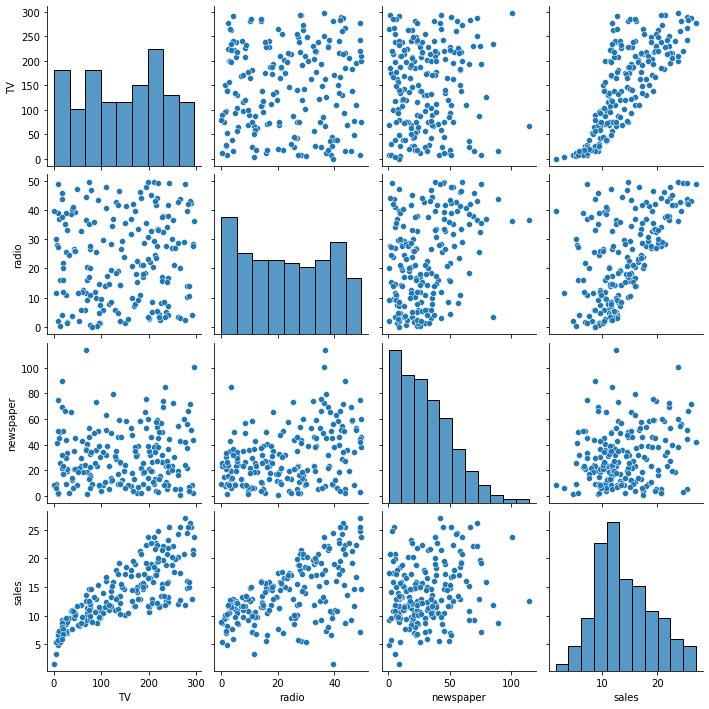

In [33]:
sns.pairplot(df)

- Sales shows linear realtionship with TV & Radio & some Linear relation with newspaper..
- rest of the variables is not forming linear relationship with each other except newspaper
- newspaper shows some Linearity with radio & TV.

# Correlation

In [34]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- Target Col Sales High Correlation with TV & medium correlation with radio.
- Target has least correlation with newspaper.
- TV has least correlation wih newspaper & radio.
- radio has some positive correlation with newspaper & least correlation with TV.
- newspaper has some positive correlation with sales & radio and least with TV.

# Correlation Heatmap

<AxesSubplot:>

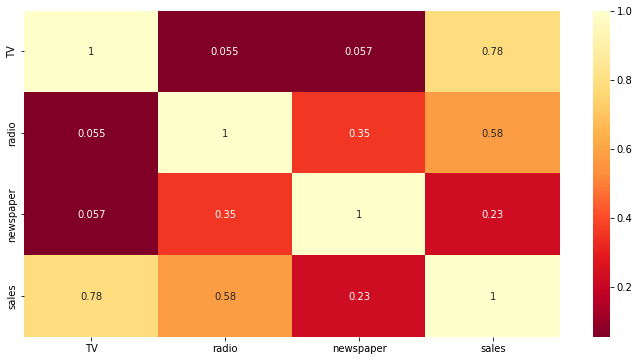

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Target Col Sales High Correlation with TV & medium correlation with radio.
- Target has least correlation with newspaper.
- TV has least correlation wih newspaper & radio.
- radio has some positive correlation with newspaper & least correlation with TV.
- newspaper has some positive correlation with sales & radio and least with TV.

# VIF : Multicollinearity check

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Importing VIF libraries

In [37]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- Computing VIF on dataframe

In [38]:
vif_calc()

   VIF Factor   features
0   23.198876         TV
1   12.570312      radio
2    3.153498  newspaper
3   55.303920      sales


- Sales has High VIF value and its an target variable.
- Multicollinearity seen with TV & Radio
- No Col is dropped as it is influencing target col.

# Skewness Removing with sqrt method.

In [39]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

- newspaper shows slightly positive skewness

In [40]:
import numpy as np
df['newspaper']=np.sqrt(df['newspaper'])
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

- skewness removed by applying sqrt method.

## Disstplot

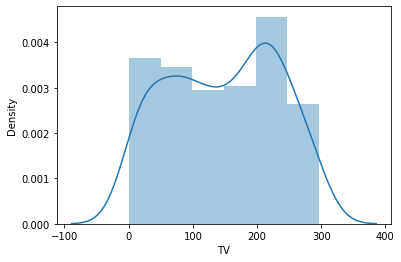

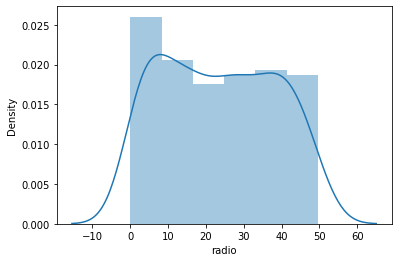

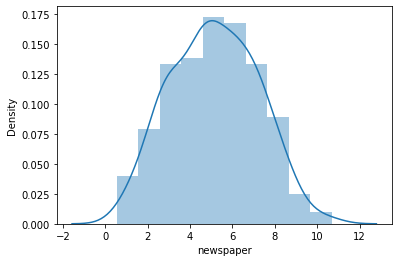

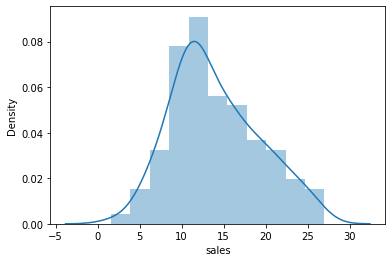

In [41]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- since the values falls in with in the normal range of -0.5 & 0.5 skewness is not removed further. 

# Dividing dataframe into independent variable & Target Variable

In [42]:
x=df.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


- x - Independent variables 

In [43]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

- y - target variable = sales

# Standard Scaling 

In [46]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

- Standard Scaler is applied to x-Independent Variables to scale the values of all col in similar range.

In [47]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

1.0166666666666666 at random_state 0
0.9000000000000001 at random_state 1
0.8393939393939392 at random_state 2
0.9424242424242423 at random_state 3
0.8999999999999999 at random_state 4
0.7969696969696971 at random_state 5
0.9363636363636363 at random_state 6
0.9090909090909092 at random_state 7
0.8424242424242425 at random_state 8
1.0424242424242425 at random_state 9
1.0045454545454546 at random_state 10
1.18939393939394 at random_state 11
0.8484848484848483 at random_state 12
0.9984848484848483 at random_state 13
0.8318181818181819 at random_state 14
0.8848484848484849 at random_state 15
0.7787878787878786 at random_state 16
0.7545454545454546 at random_state 17
0.9636363636363635 at random_state 18
0.9606060606060608 at random_state 19
1.1424242424242426 at random_state 20
0.8924242424242423 at random_state 21
0.9484848484848487 at random_state 22
1.1090909090909091 at random_state 23
0.9954545454545453 at random_state 24
0.8136363636363639 at random_state 25
0.9393939393939394 at ra

- DTR is applied for 200 Random state iteration to select the best random state.

In [48]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  1.3833333333333333  on Random_state  53


- Best Random state is selected with MAE = 1.38

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 53)

- Best random state = 53 is applied
- dataset is divided into train & test
- 30% test set used for prediction
- 70% train set used for model preparation.

In [50]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  1.2448735246195928


0.8903904232665426

- LR MAE = 1.247 with model learned to 89%

In [51]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  1.4183333333333334


1.0

- DTR MAE = 1.41 with model learned to 100%

In [52]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.7043666666666665


0.9964776817684595

- RFR MAE = 0.70 with model learned to 99%

In [53]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  1.1770112635530197


0.9161653149025263

- SVR MAE = 1.17 with model learned to 91%

In [54]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  0.6137615585327147


0.9999999396300053

- XGBR MAE = 0.61 with model learned to 99%

# K-Fold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [56]:
cross_validation=KFold(5, shuffle =True) 
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [57]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.8810183472164212


In [58]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

0.9266564869923215


In [59]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.9795839611808642


In [60]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

0.9110371099262645


In [61]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

0.9713458670365771


- The best model is RFR as it has least diff value with RFR MAE - RFR CV.

# Hyperparameter & GridsearchCV

In [62]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV

In [81]:
import numpy as np
parameter = {'bootstrap': [True,False],
             'max_depth': np.arange(2,10),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'min_samples_split':[2,5],
             'n_estimators': [100]}

- Setting Hyperparameter with diff value to select the best one after applying GridserachCV

In [82]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)
# Creating Grid Search CV Object and Applying GridSearch on best Model - RFR

In [83]:
GCV.fit(x_train,y_train) # Applying RFR-Gridsearch to training set with parameters

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]})

- GridsearchCV applied to training set.

In [84]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

- Best Param is selected through GridsearchCV

In [87]:
Final_mod = RandomForestRegressor(bootstrap = True, max_depth = 7, max_features = 'auto', min_samples_leaf = 1, min_samples_split= 2, n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

# Applying Best RFR hyperparameter to the model and predicting MAE

Mean Absolute error:  0.6295079332980691


- Best Model shows MAE = 0.62

In [ ]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Exporting ML model as .pkl file through joblib library